In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/Users/simjoo/Projects/STRT_wound/scripts/'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from WND_misc_scripts_v2_0 import *
from WND_neg_binom_regression_v2_0 import *
from WND_pseudotemporal_ordering_v2_0 import *
from WND_outlier_cell_detection_v2_0 import *

In [5]:
from matplotlib_venn import venn2

# Initialize engines

In [6]:
from ipyparallel import Client

In [7]:
c = Client(profile='default')

In [8]:
dview = c[:]

In [9]:
dview.execute('import sys')
dview.execute('sys.path.append("/Users/simjoo/Projects/STRT_wound/scripts/")')
dview.execute('from WND_misc_scripts_v2_0 import *')
dview.execute('from WND_neg_binom_regression_v2_0 import *')
dview.execute('from WND_pseudotemporal_ordering_v2_0 import *')
dview.execute('from WND_outlier_cell_detection_v2_0 import *')

<AsyncResult: execute>

# Import Data

In [10]:
exp_id = '201603171136_v2.6'
path_input = '/Users/simjoo/Projects/STRT_wound/data_input/v2.6'
path_output = '/Users/simjoo/Projects/STRT_wound/data_output/v2.6'
path_figures = '/Users/simjoo/Projects/STRT_wound/figures/v2.6'

In [11]:
seq = loadData_v1(path_input, exp_id, 'seq_WND', 'DataFrame')
meta = loadData_v1(path_input, exp_id, 'meta_WND', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [12]:
seq_sel_norm = loadData_v1(path_output, exp_id, 'seq_sel_norm', 'DataFrame')
seq_sel_Lgr5_norm = loadData_v1(path_output, exp_id, 'seq_sel_Lgr5_norm', 'DataFrame')
seq_sel_Lgr6_norm = loadData_v1(path_output, exp_id, 'seq_sel_Lgr6_norm', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [13]:
cells_Lgr5_wnd = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd', 'Series')
cells_Lgr5_wnd_ctrl = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd_ctrl', 'Series')
cells_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd_ctrl_sel', 'Series')

cells_Lgr6_wnd = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd', 'Series')
cells_Lgr6_wnd_ctrl = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd_ctrl', 'Series')
cells_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd_ctrl_sel', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [80]:
cl_Lgr5_wnd = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd', 'Series').astype(str)
cl_Lgr5_wnd = AP_groups_reorder_v2(cl_Lgr5_wnd, ['3','2','0','1','4'])

cl_Lgr5_wnd_ctrl = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd_ctrl', 'Series')
cl_Lgr5_wnd_ctrl = AP_groups_reorder_v2(cl_Lgr5_wnd_ctrl, ['ctrl','3','2','0','1','4'])

cl_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd_ctrl_sel', 'Series')
cl_Lgr5_wnd_ctrl_sel = AP_groups_reorder_v2(cl_Lgr5_wnd_ctrl_sel, ['ctrl','3','2','0','1','4'])

cl_Lgr6_wnd = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd', 'Series').astype(str)
cl_Lgr6_wnd = AP_groups_reorder_v2(cl_Lgr6_wnd[cl_Lgr6_wnd!='3'], ['1','5','4','2','0'])

cl_Lgr6_wnd_ctrl = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl', 'Series')
cl_Lgr6_wnd_ctrl = AP_groups_reorder_v2(cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl!='3'], ['ctrl - IFE','ctrl - IST','1','5','4','2','0'])

cl_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl_sel', 'Series')
cl_Lgr6_wnd_ctrl_sel = AP_groups_reorder_v2(cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel!='3'], ['ctrl - IFE','ctrl - IST','1','5','4','2','0'])

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [15]:
tsne_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'tsne_Lgr5_wnd_ctrl_sel', 'DataFrame')

tsne_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'tsne_Lgr6_wnd_ctrl_sel', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [16]:
NBR_states_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_states_traces')
NBR_states_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_states_summary')
NBR_states_Lgr5_pval_0d = loadData_from_pickle_v1(path_output,exp_id,'NBR_states_Lgr5_pval_0d')
NBR_states_Lgr6_pval_0d = loadData_from_pickle_v1(path_output,exp_id,'NBR_states_Lgr6_pval_0d')

In [17]:
cmap_Lgr5_time = loadData_v1(path_output, exp_id, 'cmap_Lgr5_time', 'Series')
cmap_Lgr6_time = loadData_v1(path_output, exp_id, 'cmap_Lgr6_time', 'Series')
cmap_Lgr5_state = loadData_v1(path_output, exp_id, 'cmap_Lgr5_state', 'Series')
cmap_Lgr6_state = loadData_v1(path_output, exp_id, 'cmap_Lgr6_state', 'Series')
cmap_Lgr5_Lgr6_state = pd.concat([cmap_Lgr5_state,cmap_Lgr6_state])

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [18]:
TF_mm9 = open('%s/TF_mm9.txt' % path_input, 'r').read().split()

# tSNE - Lgr5 & Lgr6 distance

### Correlation distance - condensed

In [19]:
c_sel = list(cl_Lgr5_wnd_ctrl.index) + list(cl_Lgr6_wnd_ctrl.index)

In [20]:
seq_sel_norm_log2 = log2Transform(seq_sel_norm[c_sel])


Calculating binary logarithm of x + 1


In [21]:
seq_sel_norm_log2_sel = dropNull_v2(seq_sel_norm_log2, path_input, cutoff_mean = 0.5, drop_markers=False, drop_spikes=False)


Dropping unexpressed genes from dataset


In [22]:
len(seq_sel_norm_log2_sel.index)

1436

In [23]:
corr_c_Lgr5_Lgr6 = pd.DataFrame(index = list(cl_Lgr6_wnd_ctrl.index) + list(cl_Lgr5_wnd_ctrl.index), 
                                columns = list(cl_Lgr6_wnd_ctrl.index) + list(cl_Lgr5_wnd_ctrl.index))

for c1 in corr_c_Lgr5_Lgr6.index:
    for c2 in corr_c_Lgr5_Lgr6.columns:
        
        corr_c_Lgr5_Lgr6.ix[c1, c2] = scipy.spatial.distance.correlation(seq_sel_norm_log2_sel[c1], seq_sel_norm_log2_sel[c2])

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [24]:
return_unique(cl_Lgr6_wnd_ctrl_sel)

['ctrl - IFE', 'ctrl - IST', '5', '1', '4', '2', '0']

In [27]:
groups = {'CTRL - Lgr5': cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['ctrl'])].index,
          'PrC - Lgr5': cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['3'])].index,
          'WF - Lgr5': cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['2','0'])].index,
          'WEpB - Lgr5': cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['1','4'])].index,
          'CTRL - Lgr6': cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['ctrl - IFE','ctrl - IST'])].index,
          'WF - Lgr6': cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['5','1'])].index,
          'WEpB - Lgr6': cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['4'])].index,
          'WEpD - Lgr6': cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['2', '0'])].index,}

corr_c_Lgr5_Lgr6_groups_cond = pd.DataFrame(index = ['CTRL - Lgr5','PrC - Lgr5','WF - Lgr5','WEpB - Lgr5'],
                                            columns = ['CTRL - Lgr6','WF - Lgr6','WEpB - Lgr6','WEpD - Lgr6'])

for k1 in corr_c_Lgr5_Lgr6_groups_cond.index:
    for k2 in corr_c_Lgr5_Lgr6_groups_cond.columns:
        c1, c2 = groups[k1], groups[k2]
        tmp = corr_c_Lgr5_Lgr6.ix[c1,c2].median().median()
        corr_c_Lgr5_Lgr6_groups_cond.ix[k1,k2] = tmp

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [28]:
corr_c_Lgr5_Lgr6_groups_cond

,CTRL - Lgr6,WF - Lgr6,WEpB - Lgr6,WEpD - Lgr6
CTRL - Lgr5,0.623329,0.593547,0.554877,0.591312
PrC - Lgr5,0.590459,0.539286,0.515353,0.562556
WF - Lgr5,0.616421,0.441758,0.448768,0.489093
WEpB - Lgr5,0.628283,0.486648,0.485762,0.521395


"\nfigname = 'v2.6_4_Lgr5_Lgr6_distance_condensed.pdf'\nplt.savefig('%s/%s' % (path_figures, figname), \n            format = 'pdf', \n            transparent = True, \n            bbox_inches = 'tight', \n            pad_inches = 0, \n            rasterized = True)\n"

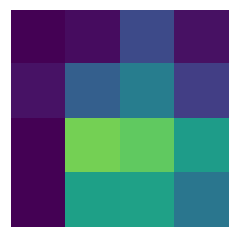

In [29]:
data = corr_c_Lgr5_Lgr6_groups_cond.astype(float)

#initialize figure

height = len(data.index)
width = len(data.columns)

plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

ax.imshow(data, cmap = plt.cm.viridis_r, vmin = 0.4, vmax = 0.6, origin = 'upper')

clean_axis(ax)
"""
figname = 'v2.6_4_Lgr5_Lgr6_distance_condensed.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)
"""

In [81]:
corr_c_Lgr5_Lgr6_groups = pd.DataFrame(index = return_unique(cl_Lgr5_wnd_ctrl),
                                       columns = return_unique(cl_Lgr6_wnd_ctrl))

for k1 in corr_c_Lgr5_Lgr6_groups.index:
    for k2 in corr_c_Lgr5_Lgr6_groups.columns:
        c1 = cl_Lgr5_wnd_ctrl[cl_Lgr5_wnd_ctrl==k1].index
        c2 = cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl==k2].index
        tmp = corr_c_Lgr5_Lgr6.ix[c1,c2].median().median()
        corr_c_Lgr5_Lgr6_groups.ix[k1,k2] = tmp

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [82]:
corr_c_Lgr5_Lgr6_groups

,ctrl - IFE,ctrl - IST,1,5,4,2,0
ctrl,0.617372,0.636046,0.587654,0.594483,0.558984,0.57129,0.617616
3,0.577191,0.591422,0.540551,0.527777,0.515353,0.536465,0.600293
2,0.567067,0.617328,0.443973,0.406777,0.44572,0.461973,0.511874
0,0.591712,0.654326,0.45075,0.390617,0.466415,0.47723,0.510572
1,0.613328,0.642321,0.514156,0.52141,0.509034,0.52408,0.561562
4,0.60873,0.649995,0.464312,0.469716,0.470324,0.485911,0.515716


In [83]:
return_unique(cl_Lgr6_wnd_ctrl_sel)

['ctrl - IFE', 'ctrl - IST', '1', '5', '4', '2', '0']

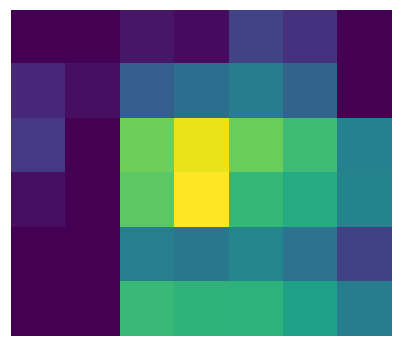

In [86]:
data = corr_c_Lgr5_Lgr6_groups.astype(float)

#initialize figure

height = len(data.index)
width = len(data.columns)

plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

ax.imshow(data, cmap = plt.cm.viridis_r, vmin = 0.4, vmax = 0.6, origin = 'upper')

clean_axis(ax)

figname = 'v2.6_4_Lgr5_Lgr6_distanced.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

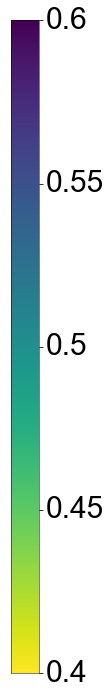

In [286]:
cmap = plt.cm.viridis_r

#initialize figure

height = 12
width = 0.5

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

for pos in np.arange(0.0, 1.0, 0.001):
    axLabel.axhspan(pos, pos + 0.001, color = cmap(pos))
    
remove_ticks(axLabel)

axLabel.set_ylim(0,1)
axLabel.set_yticks([0.0,0.25, 0.5, 0.75, 1.0])
axLabel.set_yticklabels([0.4, 0.45, 0.5, 0.55, 0.6], family = 'Arial', fontsize = 30, va = 'center', ha = 'left')
axLabel.yaxis.set_ticks_position('right')

figname = 'v2.6_4_Legend_distance.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Wound front signature

### Select WFmax for each gene (max min) and get pvals vs. ctrl and Lgr5/Lgr6 WF

In [22]:
gr_Lgr5 = ['Lgr5 - 2','Lgr5 - 0']
gr_Lgr6 = ['Lgr6 - 5','Lgr6 - 1']
traces_min = NBR_states_summary.swaplevel(0,1).loc['min']

NBR_WF_max_traces = pd.DataFrame(index = NBR_states_traces.index, columns = ['Lgr5 - ctrl',
                                                                             'Lgr5 - WFmax',
                                                                             'Lgr6 - ctrl',
                                                                             'Lgr6 - WFmax'])

for g in NBR_WF_max_traces.index:
    NBR_WF_max_traces.loc[g,'Lgr5 - ctrl'] = NBR_states_traces.loc[g, 'Lgr5 - ctrl']
    gr_sel_Lgr5 = traces_min.loc[g,gr_Lgr5].sort_values().index[-1]
    NBR_WF_max_traces.loc[g,'Lgr5 - WFmax'] = NBR_states_traces.loc[g, gr_sel_Lgr5]
    
    NBR_WF_max_traces.loc[g,'Lgr6 - ctrl'] = NBR_states_traces.loc[g, 'Lgr6 - ctrl - IFE']
    gr_sel_Lgr6 = traces_min.loc[g,gr_Lgr6].sort_values().index[-1]
    NBR_WF_max_traces.loc[g,'Lgr6 - WFmax'] = NBR_states_traces.loc[g, gr_sel_Lgr6]

In [23]:
NBR_WF_max_summary = neg_binom_summary_stats_v1P(NBR_WF_max_traces, dview)

In [24]:
gr_sel = ['Lgr5 - ctrl', 'Lgr5 - WFmax']
NBR_WF_Lgr5_pval_0d = neg_binom_estimate_prob_v1P(NBR_WF_max_traces[gr_sel], 'Lgr5 - ctrl', dview)

In [25]:
gr_sel = ['Lgr6 - ctrl', 'Lgr6 - WFmax']
NBR_WF_Lgr6_pval_0d = neg_binom_estimate_prob_v1P(NBR_WF_max_traces[gr_sel], 'Lgr6 - ctrl', dview)

In [26]:
gr_sel = ['Lgr5 - WFmax', 'Lgr6 - WFmax']
NBR_WF_Lgr5_pval_Lgr6 = neg_binom_estimate_prob_v1P(NBR_WF_max_traces[gr_sel], 'Lgr6 - WFmax', dview)

In [27]:
gr_sel = ['Lgr5 - WFmax', 'Lgr6 - WFmax']
NBR_WF_Lgr6_pval_Lgr5 = neg_binom_estimate_prob_v1P(NBR_WF_max_traces[gr_sel], 'Lgr5 - WFmax', dview)

### Checkpoint

In [28]:
#saveData_v1(NBR_WF_Lgr5_pval_0d, path_output, exp_id, 'NBR_WF_Lgr5_pval_0d')
#saveData_v1(NBR_WF_Lgr6_pval_0d, path_output, exp_id, 'NBR_WF_Lgr6_pval_0d')
#saveData_v1(NBR_WF_Lgr5_pval_Lgr6, path_output, exp_id, 'NBR_WF_Lgr5_pval_Lgr6')
#saveData_v1(NBR_WF_Lgr6_pval_Lgr5, path_output, exp_id, 'NBR_WF_Lgr6_pval_Lgr5')

In [29]:
NBR_WF_Lgr5_pval_0d = loadData_v1(path_output, exp_id, 'NBR_WF_Lgr5_pval_0d','DataFrame')
NBR_WF_Lgr6_pval_0d = loadData_v1(path_output, exp_id, 'NBR_WF_Lgr6_pval_0d','DataFrame')
NBR_WF_Lgr5_pval_Lgr6 = loadData_v1(path_output, exp_id, 'NBR_WF_Lgr5_pval_Lgr6','DataFrame')
NBR_WF_Lgr6_pval_Lgr5 = loadData_v1(path_output, exp_id, 'NBR_WF_Lgr6_pval_Lgr5','DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


### Venn diagram

In [30]:
genes_WF_Lgr5 = NBR_WF_Lgr5_pval_0d['Lgr5 - WFmax'][NBR_WF_Lgr5_pval_0d['Lgr5 - WFmax'] < 0.001].index

In [31]:
len(genes_WF_Lgr5)

547

In [32]:
genes_WF_Lgr6 = NBR_WF_Lgr6_pval_0d['Lgr6 - WFmax'][NBR_WF_Lgr6_pval_0d['Lgr6 - WFmax'] < 0.001].index

In [33]:
len(genes_WF_Lgr6)

705

In [34]:
genes_WF_shared = list(set(genes_WF_Lgr5) & set(genes_WF_Lgr6))
genes_WF_Lgr5_un = list(set(genes_WF_Lgr5) - set(genes_WF_Lgr6))
genes_WF_Lgr6_un = list(set(genes_WF_Lgr6) - set(genes_WF_Lgr5))

In [35]:
len(genes_WF_shared), len(genes_WF_Lgr5_un), len(genes_WF_Lgr6_un)

(240, 307, 465)

In [36]:
genes_WF_Lgr5_un_sel = NBR_WF_Lgr5_pval_Lgr6.ix[genes_WF_Lgr5_un, 'Lgr5 - WFmax'][NBR_WF_Lgr5_pval_Lgr6.ix[genes_WF_Lgr5_un, 'Lgr5 - WFmax'] < 0.001].index

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [38]:
genes_WF_Lgr6_un_sel = NBR_WF_Lgr6_pval_Lgr5.ix[genes_WF_Lgr6_un, 'Lgr6 - WFmax'][NBR_WF_Lgr6_pval_Lgr5.ix[genes_WF_Lgr6_un, 'Lgr6 - WFmax'] < 0.001].index

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [39]:
len(genes_WF_Lgr6_un_sel)

119

/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


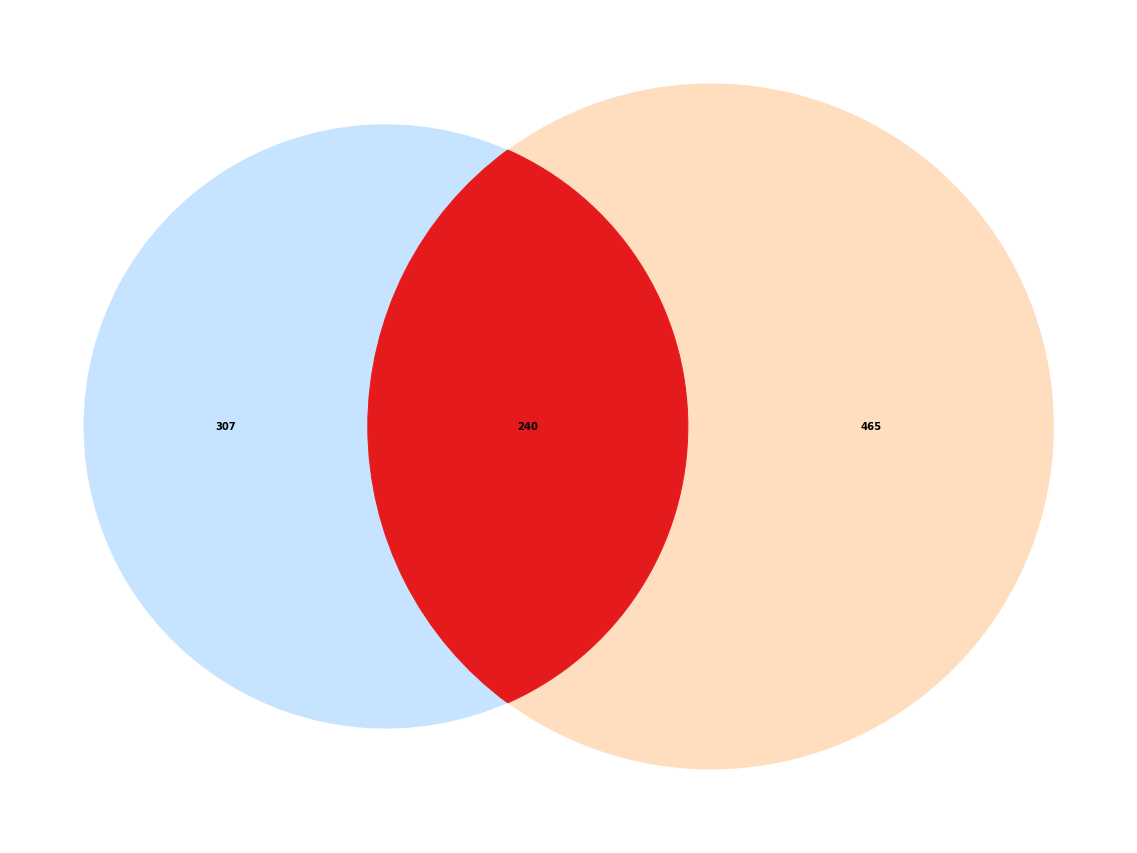

In [40]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WF_Lgr5), set(genes_WF_Lgr6)], ax = ax, set_colors=('dodgerblue','#ff7f00'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    #v.get_label_by_id(ix).set_fontsize(0)
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('10').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#e41a1c')


/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


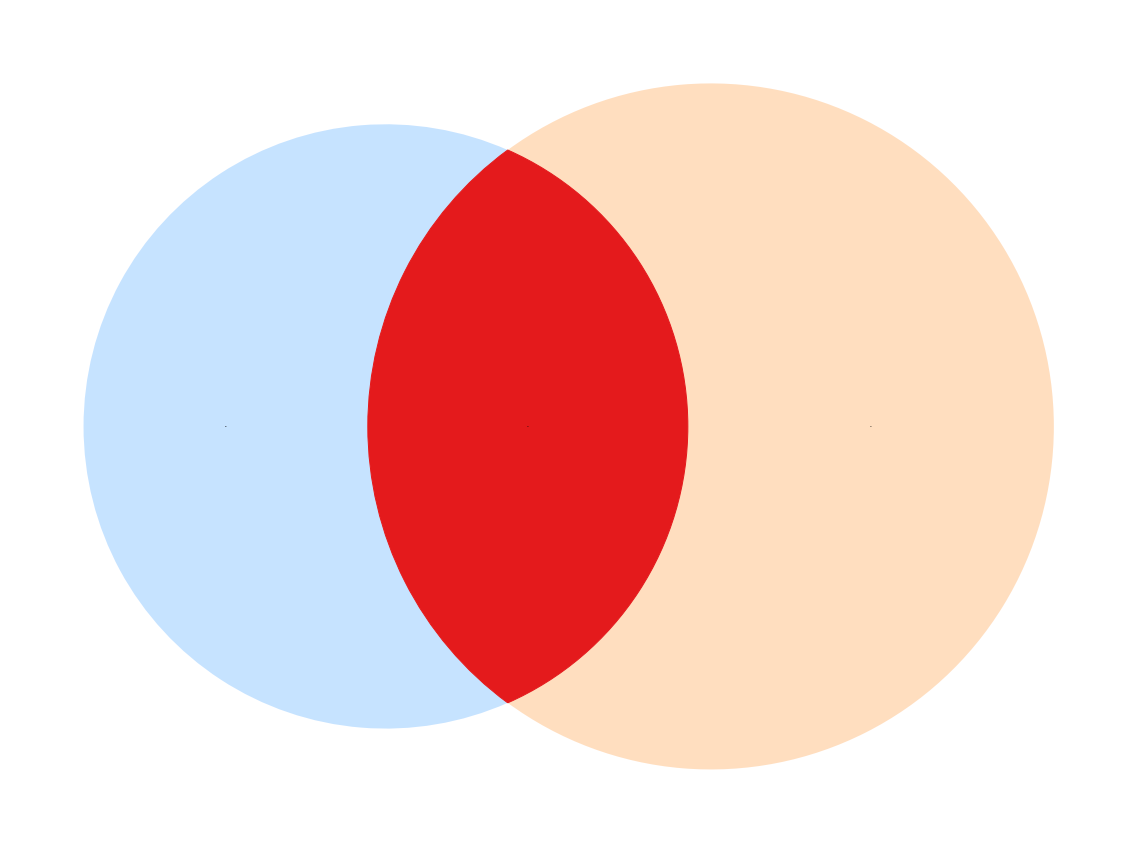

In [41]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WF_Lgr5), set(genes_WF_Lgr6)], ax = ax, set_colors=('dodgerblue','#ff7f00'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    v.get_label_by_id(ix).set_fontsize(0)
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('10').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#e41a1c')

figname = 'v2.6_4_WF_venn0.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


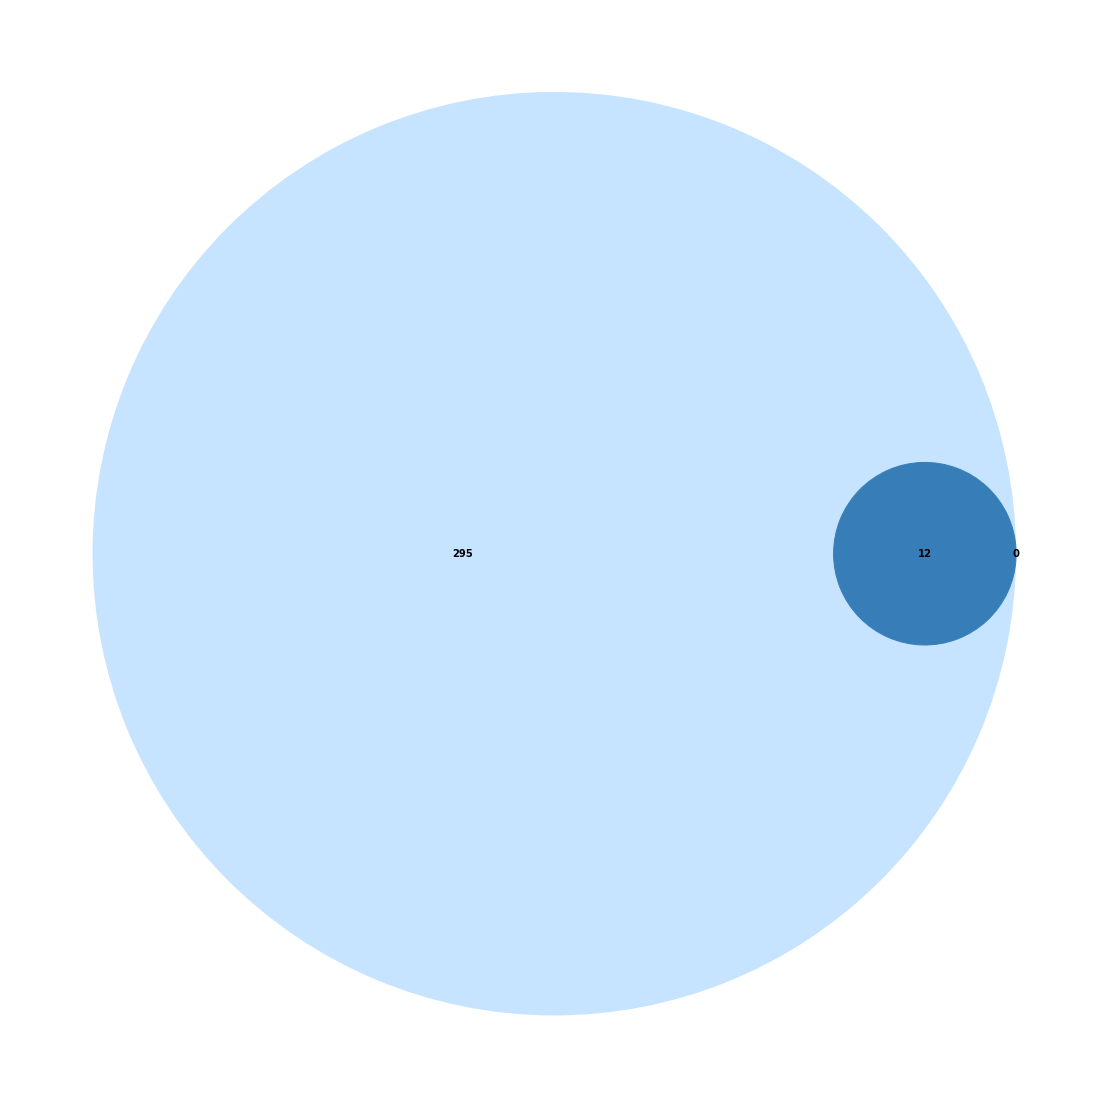

In [42]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WF_Lgr5_un), set(genes_WF_Lgr5_un_sel)], ax = ax, set_colors=('dodgerblue','#377eb8'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('10').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#377eb8')

/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


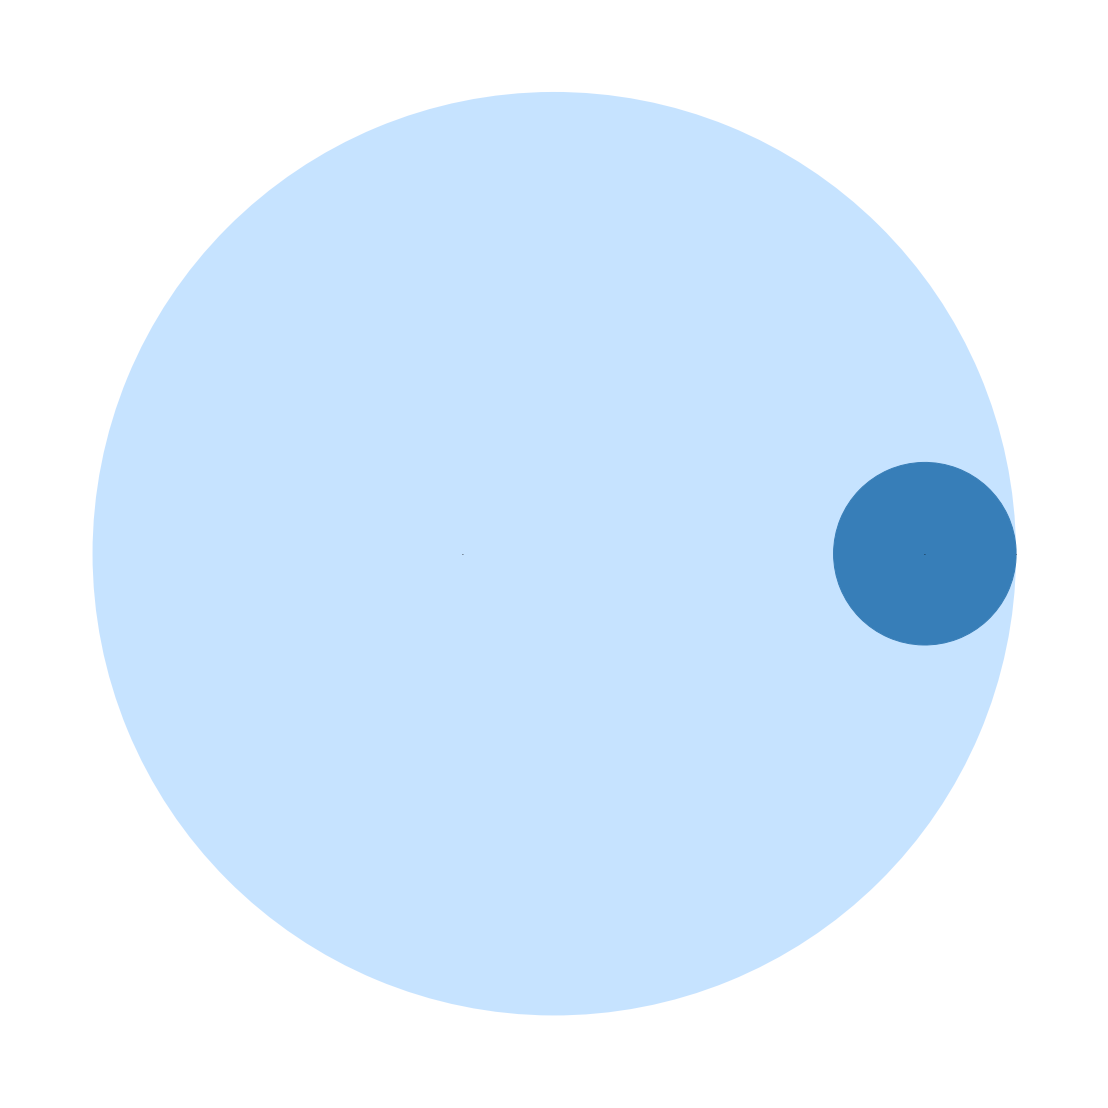

In [43]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WF_Lgr5_un), set(genes_WF_Lgr5_un_sel)], ax = ax, set_colors=('dodgerblue','dodgerblue'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    v.get_label_by_id(ix).set_fontsize(0)
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('10').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#377eb8')

figname = 'v2.6_4_WF_venn1.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


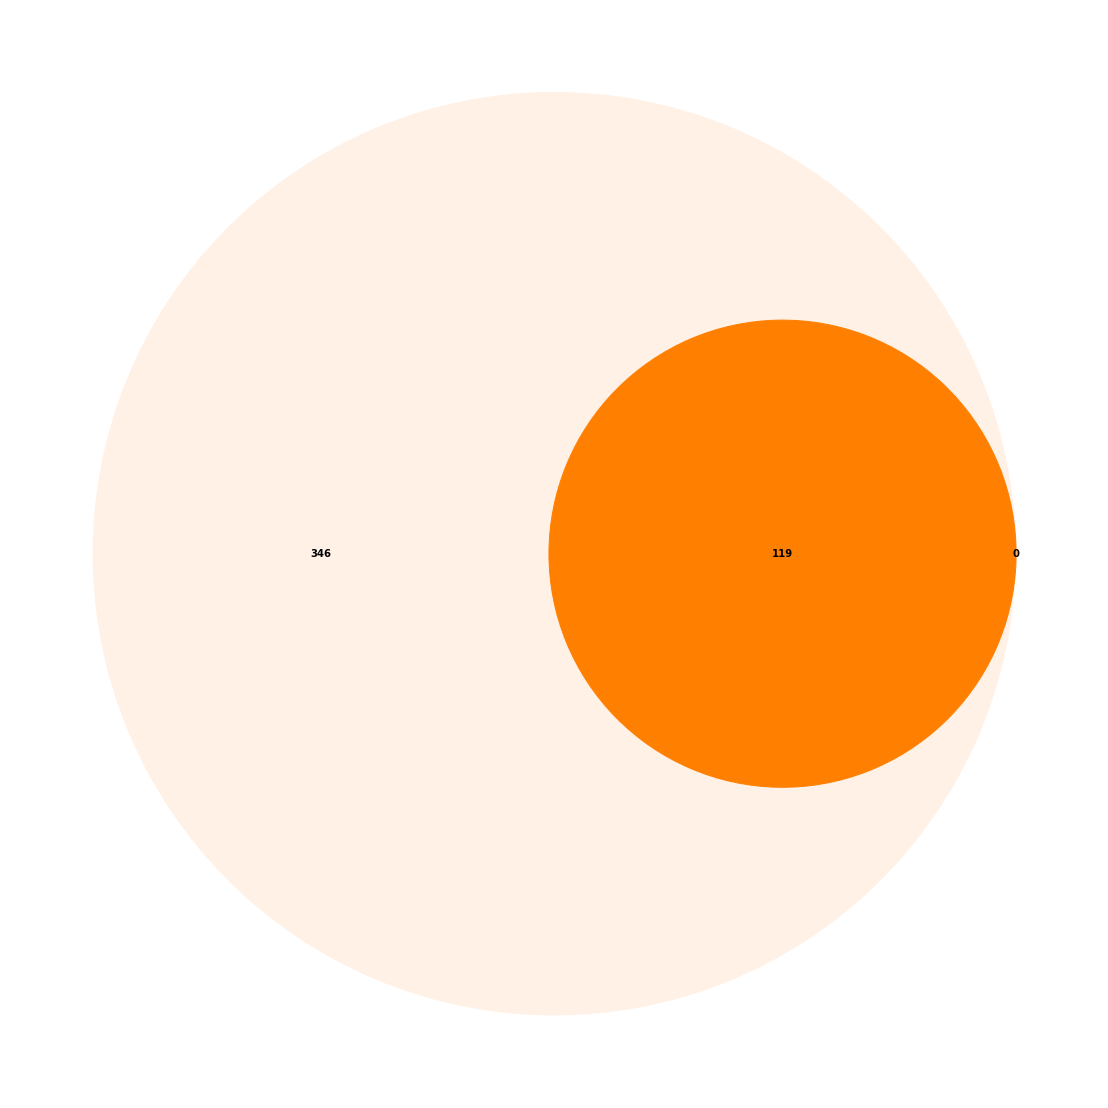

In [44]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WF_Lgr6_un), set(genes_WF_Lgr6_un_sel)], ax = ax, set_colors=('#ff7f00','#ff7f00'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#ff7f00')

/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


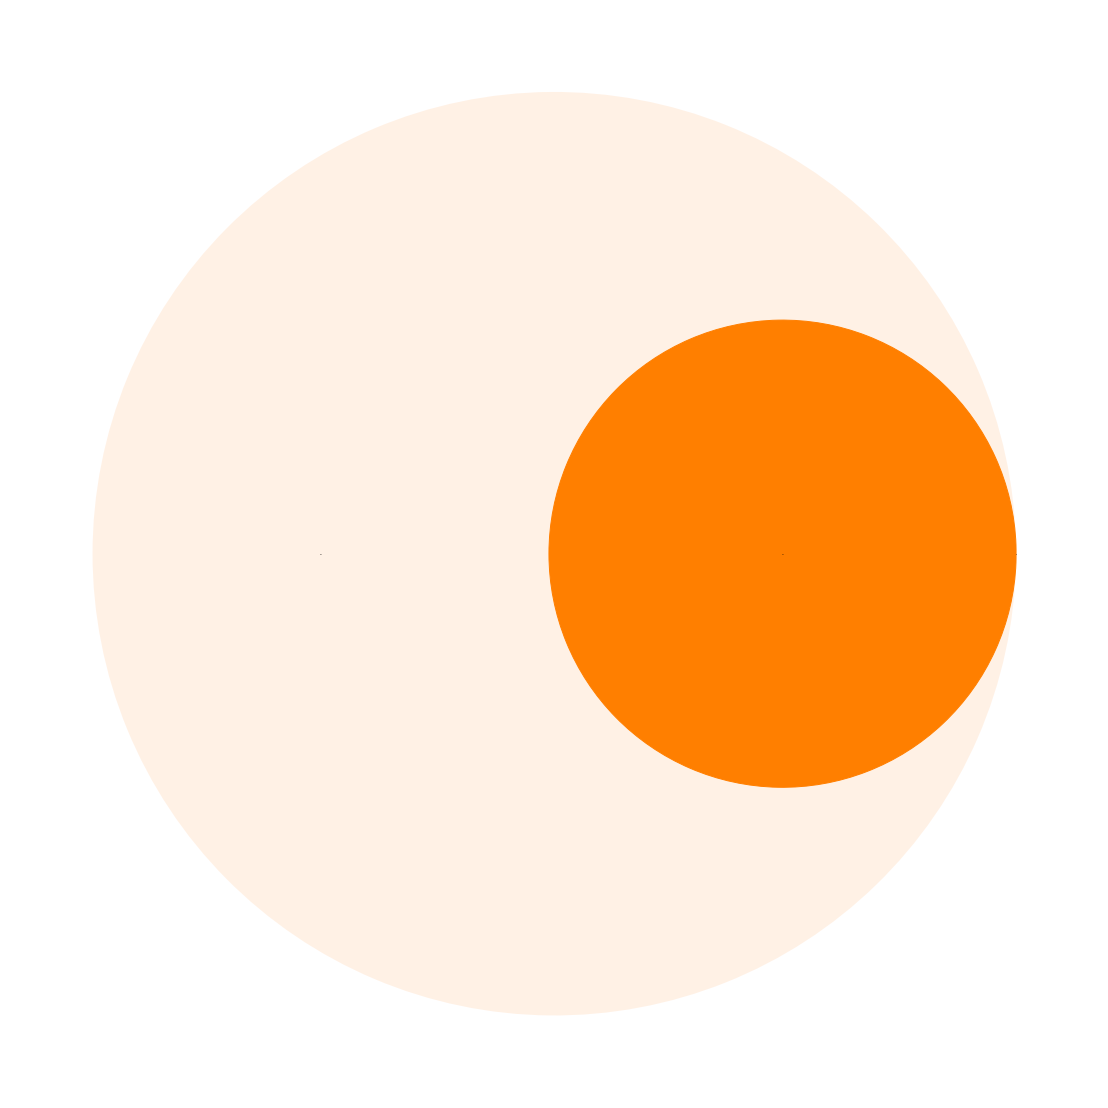

In [45]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WF_Lgr6_un), set(genes_WF_Lgr6_un_sel)], ax = ax, set_colors=('#ff7f00','#ff7f00'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    v.get_label_by_id(ix).set_fontsize(0)
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#ff7f00')

figname = 'v2.6_4_WF_venn2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

### Violin plots

In [46]:
NBR_WF_Lgr5_pval_0d_bin = neg_binom_get_binarized(NBR_WF_Lgr5_pval_0d, 0.001)
NBR_WF_Lgr6_pval_0d_bin = neg_binom_get_binarized(NBR_WF_Lgr6_pval_0d, 0.001)
NBR_WF_Lgr5_pval_Lgr6_bin = neg_binom_get_binarized(NBR_WF_Lgr5_pval_Lgr6, 0.001)
NBR_WF_Lgr6_pval_Lgr5_bin = neg_binom_get_binarized(NBR_WF_Lgr6_pval_Lgr5, 0.001)

In [1]:
NBR_WF_Lgr5_pval_0d_fc = neg_binom_get_fold_change(NBR_WF_max_summary, NBR_WF_Lgr5_pval_0d_bin, 'Lgr5 - ctrl')
NBR_WF_Lgr6_pval_0d_fc = neg_binom_get_fold_change(NBR_WF_max_summary, NBR_WF_Lgr6_pval_0d_bin, 'Lgr6 - ctrl')
NBR_WF_Lgr5_pval_Lgr6_fc = neg_binom_get_fold_change(NBR_WF_max_summary, NBR_WF_Lgr5_pval_Lgr6_bin, 'Lgr6 - WFmax')
NBR_WF_Lgr6_pval_Lgr5_fc = neg_binom_get_fold_change(NBR_WF_max_summary, NBR_WF_Lgr6_pval_Lgr5_bin, 'Lgr5 - WFmax')

In [2]:
NBR_WF_shared_fc = pd.concat([NBR_WF_Lgr5_pval_0d_fc['median']['Lgr5 - WFmax'],NBR_WF_Lgr6_pval_0d_fc['median']['Lgr6 - WFmax']],axis=1)

In [159]:
genes_sel = ['Krt6a','Tpm2','Nme1','Ifitm3','Pkm','Arpc1b','Ldha','S100a11','Ndufa4','Cfl1']

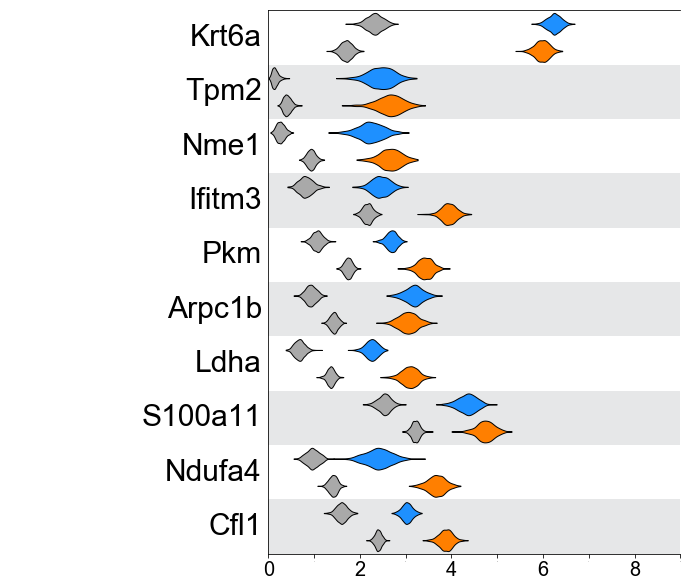

In [160]:
#define input variables

genes = genes_sel
L = len(genes)
traces = NBR_WF_max_traces
groups = [('Lgr5 - ctrl','Lgr5 - WFmax'),('Lgr6 - ctrl','Lgr6 - WFmax')]
cmap = {'Lgr5 - ctrl':'darkgrey',
        'Lgr6 - ctrl':'darkgrey',
        'Lgr5 - WFmax':'dodgerblue',
        'Lgr6 - WFmax':'#ff7f00'}
subpos = {0:-0.25,1:0.25}

#initialize figure

height = 1.0 * len(genes)
width = 12
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#create gene name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)
  
#create violin plot axis
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('left')
ax1.yaxis.set_ticks([])

#iterate over genes
    
for ix, g in enumerate(genes):
    
    #print gene name
    
    if g in TF_mm9: ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center', fontstyle = 'italic')
    else: ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center')
        
    #print background
        
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#FFFFFF', zorder = 0)        
    elif ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#E6E7E8', zorder = 0)
  
    #iterate over groups
    
    for pos, gr in enumerate(groups):
        
        #print group traces
        
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[1])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                        widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[1])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[0])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                       widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[0])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
ax1.set_xlim(left = 0)
ax1.set_xlim(right = 9)
           
for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
    if ix % 2 == 0:
        t.set_family('Arial')
        t.set_fontsize(20)
    else:
        t.set_fontsize(0)

#ax1.set_xticks([])
        
figname = 'v2.6_4_WF_genes_shared.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [161]:
NBR_WF_Lgr5_fc = pd.concat([NBR_WF_Lgr5_pval_Lgr6_fc['median']['Lgr5 - WFmax'],NBR_WF_Lgr6_pval_Lgr5_fc['median']['Lgr6 - WFmax']],axis=1)

In [162]:
NBR_WF_Lgr5_fc.ix[genes_WF_Lgr5_un_sel]['Lgr5 - WFmax'].sort_values()

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Fxyd6        0.872090
Amd2         1.100912
Tnfrsf12a    1.128761
Lrrfip1      1.185214
Emb          1.185434
Tm4sf1       1.404620
Cspg4        1.453769
Tpm1         1.562563
Epcam        1.790874
Krt17        2.184456
Hspb1        2.214882
S100a6       2.685733
Name: Lgr5 - WFmax, dtype: float64

In [167]:
genes_sel = ['S100a6','Hspb1','Krt17','Epcam','Tpm1','Cspg4','Tm4sf1','Lrrfip1','Tnfrsf12a','Amd2']

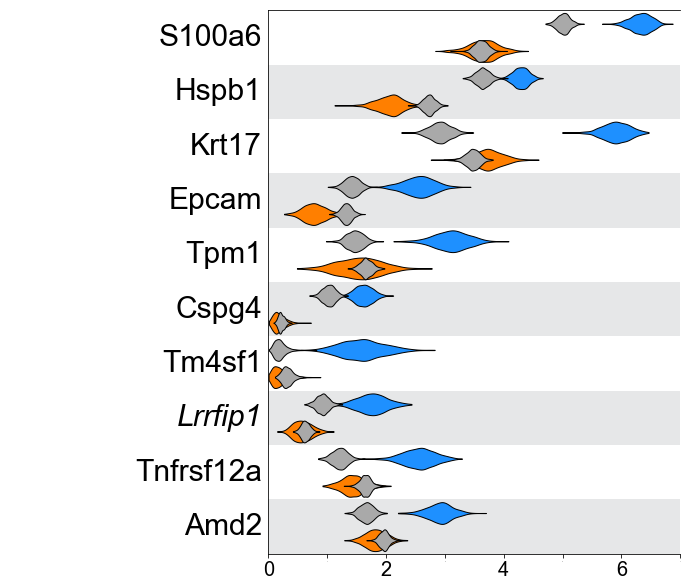

In [168]:
#define input variables

genes = genes_sel
L = len(genes)
traces = NBR_WF_max_traces
groups = [('Lgr5 - ctrl','Lgr5 - WFmax'),('Lgr6 - ctrl','Lgr6 - WFmax')]
cmap = {'Lgr5 - ctrl':'darkgrey',
        'Lgr6 - ctrl':'darkgrey',
        'Lgr5 - WFmax':'dodgerblue',
        'Lgr6 - WFmax':'#ff7f00'}
subpos = {0:-0.25,1:0.25}

#initialize figure

height = 1.0 * len(genes)
width = 12
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#create gene name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)
  
#create violin plot axis
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('left')
ax1.yaxis.set_ticks([])

#iterate over genes
    
for ix, g in enumerate(genes):
    
    #print gene name
    
    if g in TF_mm9: ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center', fontstyle = 'italic')
    else: ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center')
        
    #print background
        
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#FFFFFF', zorder = 0)        
    elif ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#E6E7E8', zorder = 0)
        
    if g == '':
        continue
  
    #iterate over groups
    
    for pos, gr in enumerate(groups):
        
        #print group traces
        
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[1])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                        widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[1])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[0])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                       widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[0])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
ax1.set_xlim(left = 0)
ax1.set_xlim(right = 7)

for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
    if ix % 2 == 0:
        t.set_family('Arial')
        t.set_fontsize(20)
    else:
        t.set_fontsize(0)
        
figname = 'v2.6_4_WF_genes_Lgr5.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [169]:
NBR_WF_Lgr6_fc = pd.concat([NBR_WF_Lgr6_pval_Lgr5_fc['median']['Lgr6 - WFmax'],NBR_WF_Lgr5_pval_0d_fc['median']['Lgr5 - WFmax']],axis=1)

In [179]:
genes_sel = ['Stfa1','Sprr2b','BC100530','B2m','Gm5416','Sprr2a1_loc2','Sprr2a2_loc2','BC117090','Fabp5','Lama3']

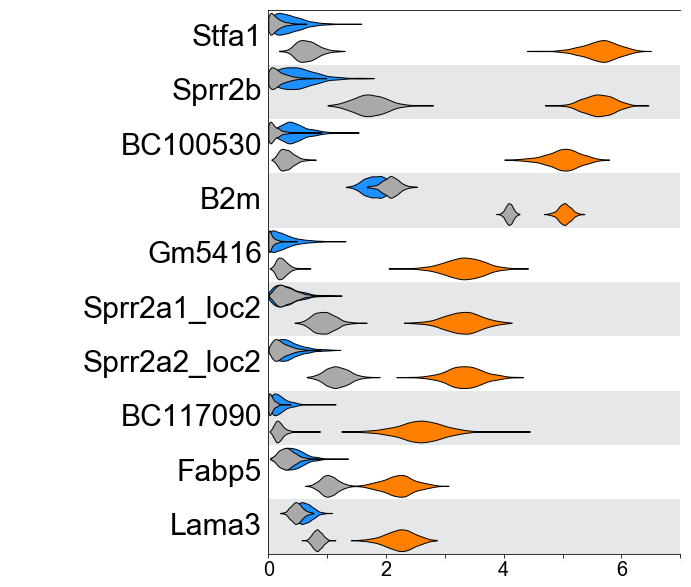

In [180]:
#define input variables

genes = genes_sel
L = len(genes)
traces = NBR_WF_max_traces
groups = [('Lgr5 - ctrl','Lgr5 - WFmax'),('Lgr6 - ctrl','Lgr6 - WFmax')]
cmap = {'Lgr5 - ctrl':'darkgrey',
        'Lgr6 - ctrl':'darkgrey',
        'Lgr5 - WFmax':'dodgerblue',
        'Lgr6 - WFmax':'#ff7f00'}
subpos = {0:-0.25,1:0.25}

#initialize figure

height = 1.0 * len(genes)
width = 12
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#create gene name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)
  
#create violin plot axis
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('left')
ax1.yaxis.set_ticks([])

#iterate over genes
    
for ix, g in enumerate(genes):
    
    #print gene name
    
    if g in TF_mm9: ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center', fontstyle = 'italic')
    else: ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center')
        
    #print background
        
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#FFFFFF', zorder = 0)        
    elif ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#E6E7E8', zorder = 0)
  
    #iterate over groups
    
    for pos, gr in enumerate(groups):
        
        #print group traces
        
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[1])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                        widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[1])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[0])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                       widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[0])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
ax1.set_xlim(left = 0)
ax1.set_xlim(right = 7)
           
for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
    if ix % 2 == 0:
        t.set_family('Arial')
        t.set_fontsize(20)
    else:
        t.set_fontsize(0)

#ax1.set_xticks([])
        
figname = 'v2.6_4_WF_genes_Lgr6.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Wound epithelium - basal layer

In [182]:
return_unique(cl_Lgr6_wnd_ctrl_sel)

['ctrl - IFE', 'ctrl - IST', '5', '1', '4', '2', '0']

### Select WEpBmax for each gene (max min) and get pvals vs. ctrl and Lgr5/Lgr6 WF

In [184]:
gr_Lgr5 = ['Lgr5 - 1','Lgr5 - 4']
gr_Lgr6 = ['Lgr6 - 4']
traces_min = NBR_states_summary.swaplevel(0,1).loc['min']

NBR_WEpB_max_traces = pd.DataFrame(index = NBR_states_traces.index, columns = ['Lgr5 - ctrl',
                                                                             'Lgr5 - WEpB',
                                                                             'Lgr6 - ctrl',
                                                                             'Lgr6 - WEpB'])

for g in NBR_WEpB_max_traces.index:
    NBR_WEpB_max_traces.loc[g,'Lgr5 - ctrl'] = NBR_states_traces.loc[g, 'Lgr5 - ctrl']
    gr_sel_Lgr5 = traces_min.loc[g,gr_Lgr5].sort_values().index[-1]
    NBR_WEpB_max_traces.loc[g,'Lgr5 - WEpB'] = NBR_states_traces.loc[g, gr_sel_Lgr5]
    
    NBR_WEpB_max_traces.loc[g,'Lgr6 - ctrl'] = NBR_states_traces.loc[g, 'Lgr6 - ctrl - IFE']
    gr_sel_Lgr6 = traces_min.loc[g,gr_Lgr6].sort_values().index[-1]
    NBR_WEpB_max_traces.loc[g,'Lgr6 - WEpB'] = NBR_states_traces.loc[g, gr_sel_Lgr6]

In [185]:
NBR_WEpB_max_summary = neg_binom_summary_stats_v1P(NBR_WEpB_max_traces, dview)

In [186]:
gr_sel = ['Lgr5 - ctrl', 'Lgr5 - WEpB']
NBR_WEpB_Lgr5_pval_0d = neg_binom_estimate_prob_v1P(NBR_WEpB_max_traces[gr_sel], 'Lgr5 - ctrl', dview)

In [187]:
gr_sel = ['Lgr6 - ctrl', 'Lgr6 - WEpB']
NBR_WEpB_Lgr6_pval_0d = neg_binom_estimate_prob_v1P(NBR_WEpB_max_traces[gr_sel], 'Lgr6 - ctrl', dview)

In [188]:
gr_sel = ['Lgr5 - WEpB', 'Lgr6 - WEpB']
NBR_WEpB_Lgr5_pval_Lgr6 = neg_binom_estimate_prob_v1P(NBR_WEpB_max_traces[gr_sel], 'Lgr6 - WEpB', dview)

In [189]:
gr_sel = ['Lgr5 - WEpB', 'Lgr6 - WEpB']
NBR_WEpB_Lgr6_pval_Lgr5 = neg_binom_estimate_prob_v1P(NBR_WEpB_max_traces[gr_sel], 'Lgr5 - WEpB', dview)

### Checkpoint

In [66]:
NBR_WEpB_Lgr5_pval_0d = loadData_v1(path_output, exp_id, 'NBR_WEpB_Lgr5_pval_0d','DataFrame')
NBR_WEpB_Lgr6_pval_0d = loadData_v1(path_output, exp_id, 'NBR_WEpB_Lgr6_pval_0d','DataFrame')
NBR_WEpB_Lgr5_pval_Lgr6 = loadData_v1(path_output, exp_id, 'NBR_WEpB_Lgr5_pval_Lgr6','DataFrame')
NBR_WEpB_Lgr6_pval_Lgr5 = loadData_v1(path_output, exp_id, 'NBR_WEpB_Lgr6_pval_Lgr5','DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


### Venn diagram

In [67]:
genes_WEpB_Lgr5 = NBR_WEpB_Lgr5_pval_0d['Lgr5 - WEpB'][NBR_WEpB_Lgr5_pval_0d['Lgr5 - WEpB'] < 0.001].index

In [68]:
len(genes_WEpB_Lgr5)

402

In [69]:
genes_WEpB_Lgr6 = NBR_WEpB_Lgr6_pval_0d['Lgr6 - WEpB'][NBR_WEpB_Lgr6_pval_0d['Lgr6 - WEpB'] < 0.001].index

In [70]:
len(genes_WEpB_Lgr6)

230

In [71]:
genes_WEpB_shared = list(set(genes_WEpB_Lgr5) & set(genes_WEpB_Lgr6))
genes_WEpB_Lgr5_un = list(set(genes_WEpB_Lgr5) - set(genes_WEpB_Lgr6))
genes_WEpB_Lgr6_un = list(set(genes_WEpB_Lgr6) - set(genes_WEpB_Lgr5))

In [72]:
len(genes_WEpB_shared), len(genes_WEpB_Lgr5_un), len(genes_WEpB_Lgr6_un)

(61, 341, 169)

In [73]:
genes_WEpB_Lgr5_un_sel = NBR_WEpB_Lgr5_pval_Lgr6.ix[genes_WEpB_Lgr5_un, 'Lgr5 - WEpB'][NBR_WEpB_Lgr5_pval_Lgr6.ix[genes_WEpB_Lgr5_un, 'Lgr5 - WEpB'] < 0.001].index

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [74]:
len(genes_WEpB_Lgr5_un_sel)

27

In [75]:
genes_WEpB_Lgr6_un_sel = NBR_WEpB_Lgr6_pval_Lgr5.ix[genes_WEpB_Lgr6_un, 'Lgr6 - WEpB'][NBR_WEpB_Lgr6_pval_Lgr5.ix[genes_WEpB_Lgr6_un, 'Lgr6 - WEpB'] < 0.001].index

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [76]:
len(genes_WEpB_Lgr6_un_sel)

24

In [89]:
genes = set(genes_WEpB_shared)

In [90]:
len(genes)

61

/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


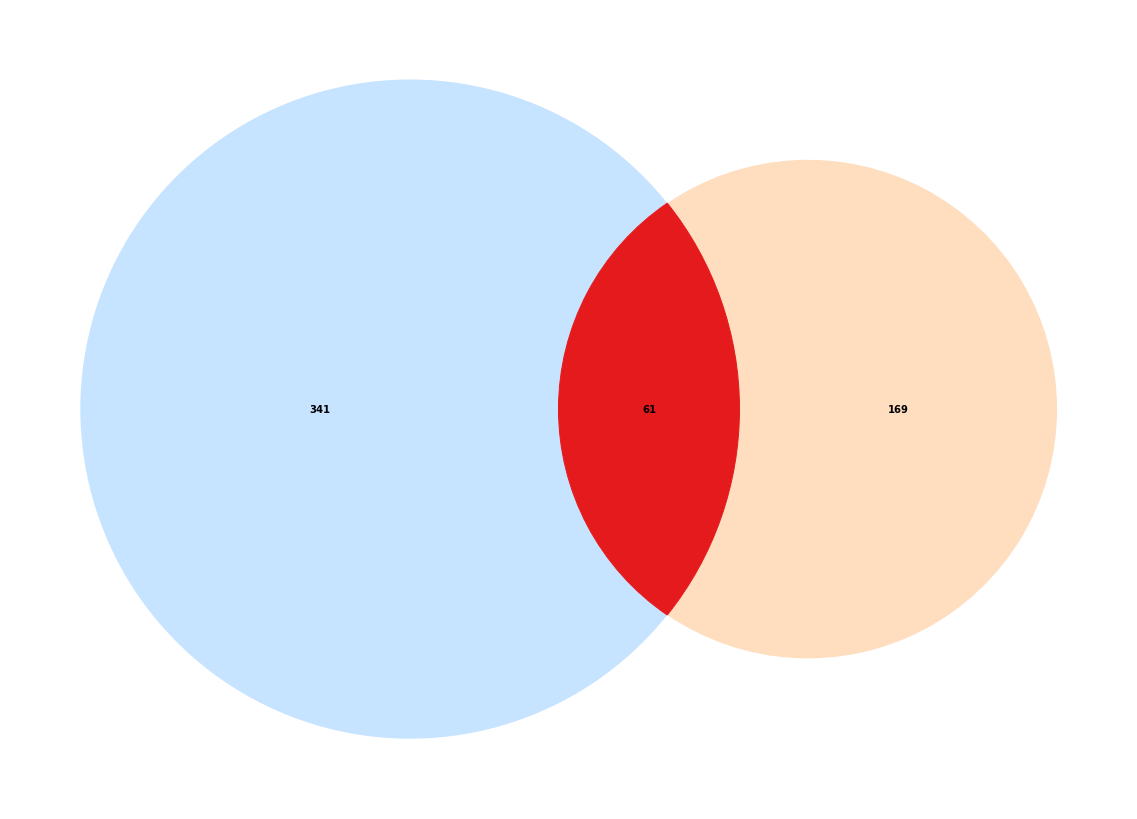

In [201]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WEpB_Lgr5), set(genes_WEpB_Lgr6)], ax = ax, set_colors=('dodgerblue','#ff7f00'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    #v.get_label_by_id(ix).set_fontsize(0)
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('10').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#e41a1c')


/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


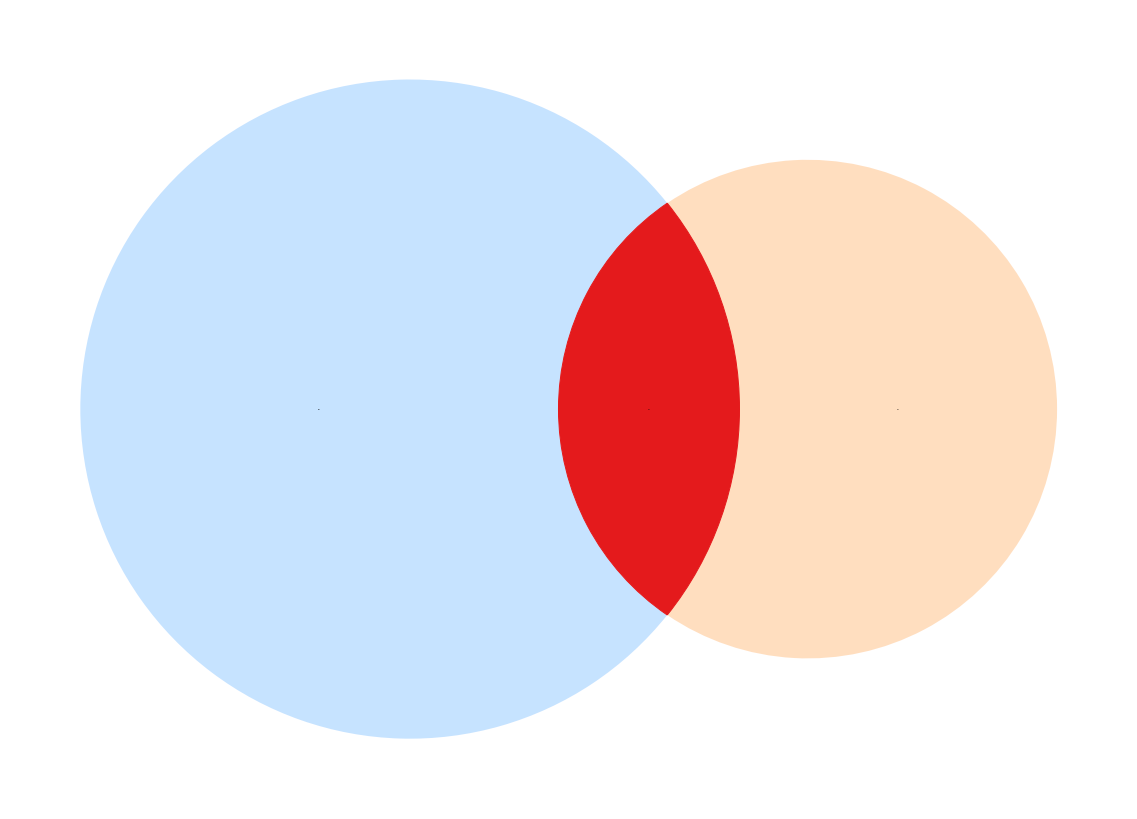

In [277]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WEpB_Lgr5), set(genes_WEpB_Lgr6)], ax = ax, set_colors=('dodgerblue','#ff7f00'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    v.get_label_by_id(ix).set_fontsize(0)
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('10').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#e41a1c')

figname = 'v2.6_4_WEpB_venn0.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


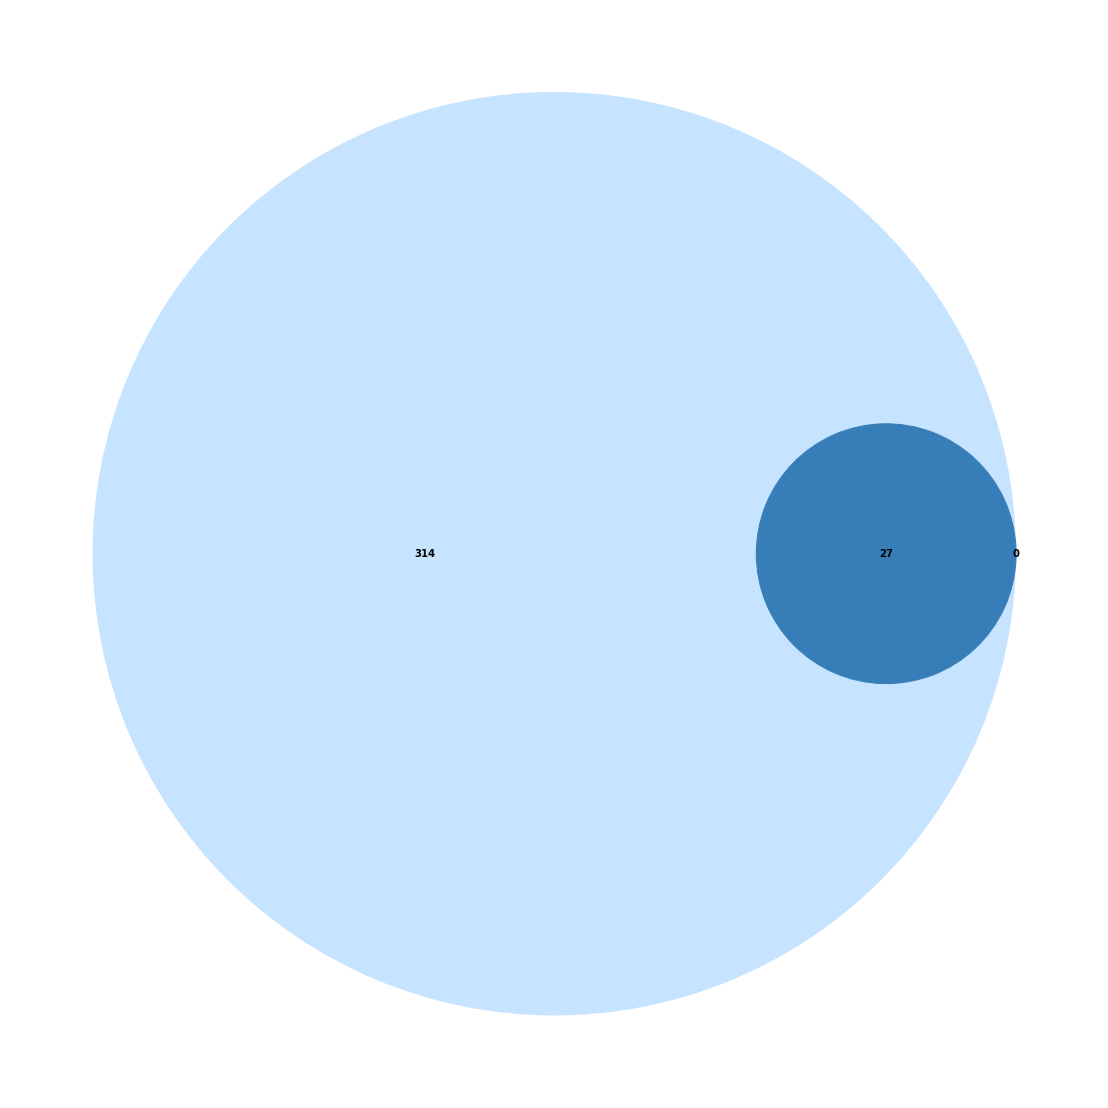

In [203]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WEpB_Lgr5_un), set(genes_WEpB_Lgr5_un_sel)], ax = ax, set_colors=('dodgerblue','#377eb8'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('10').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#377eb8')


/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


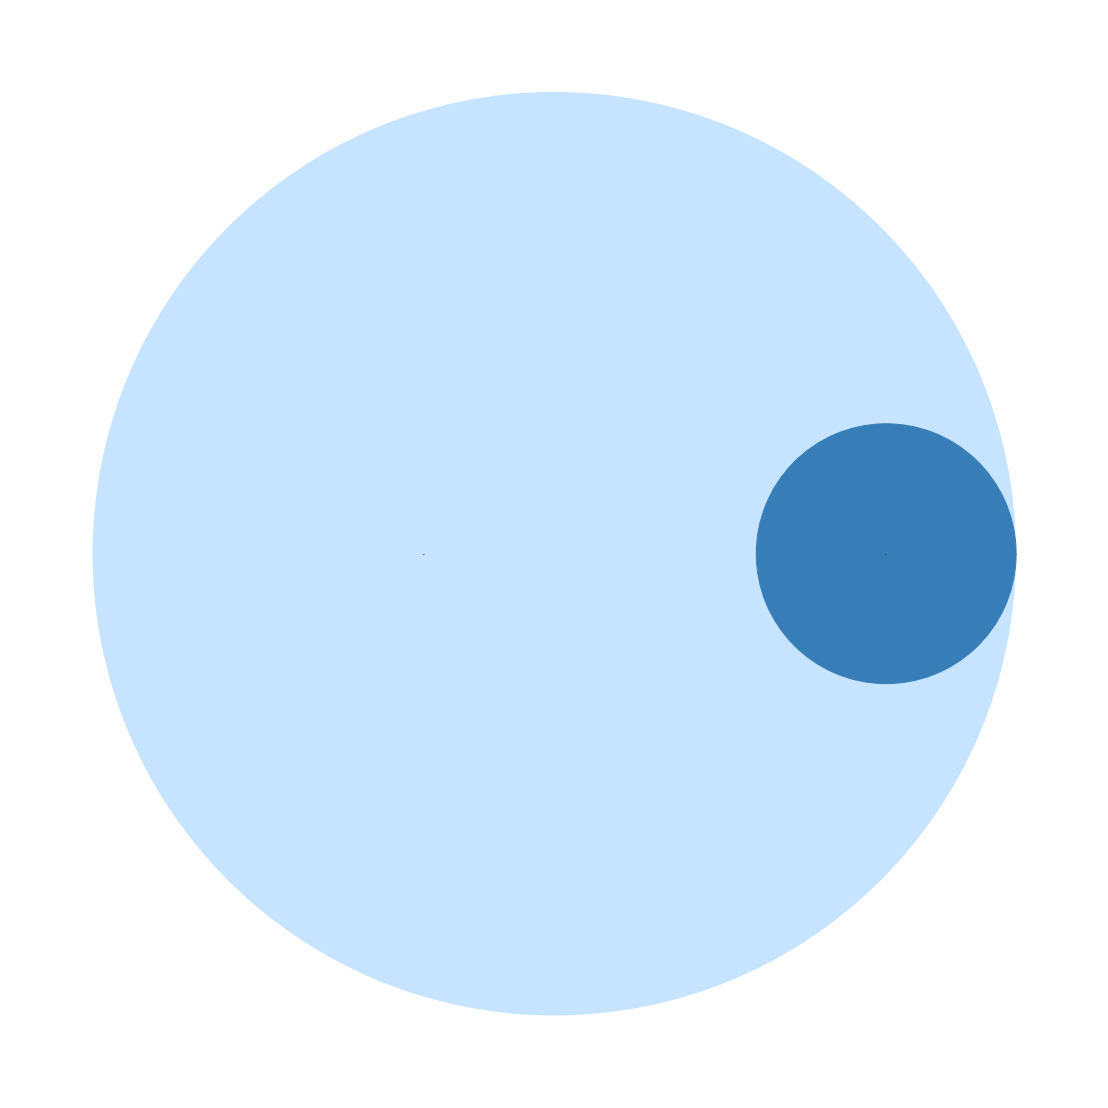

In [278]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WEpB_Lgr5_un), set(genes_WEpB_Lgr5_un_sel)], ax = ax, set_colors=('dodgerblue','dodgerblue'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    v.get_label_by_id(ix).set_fontsize(0)
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('10').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#377eb8')

figname = 'v2.6_4_WEpB_venn1.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


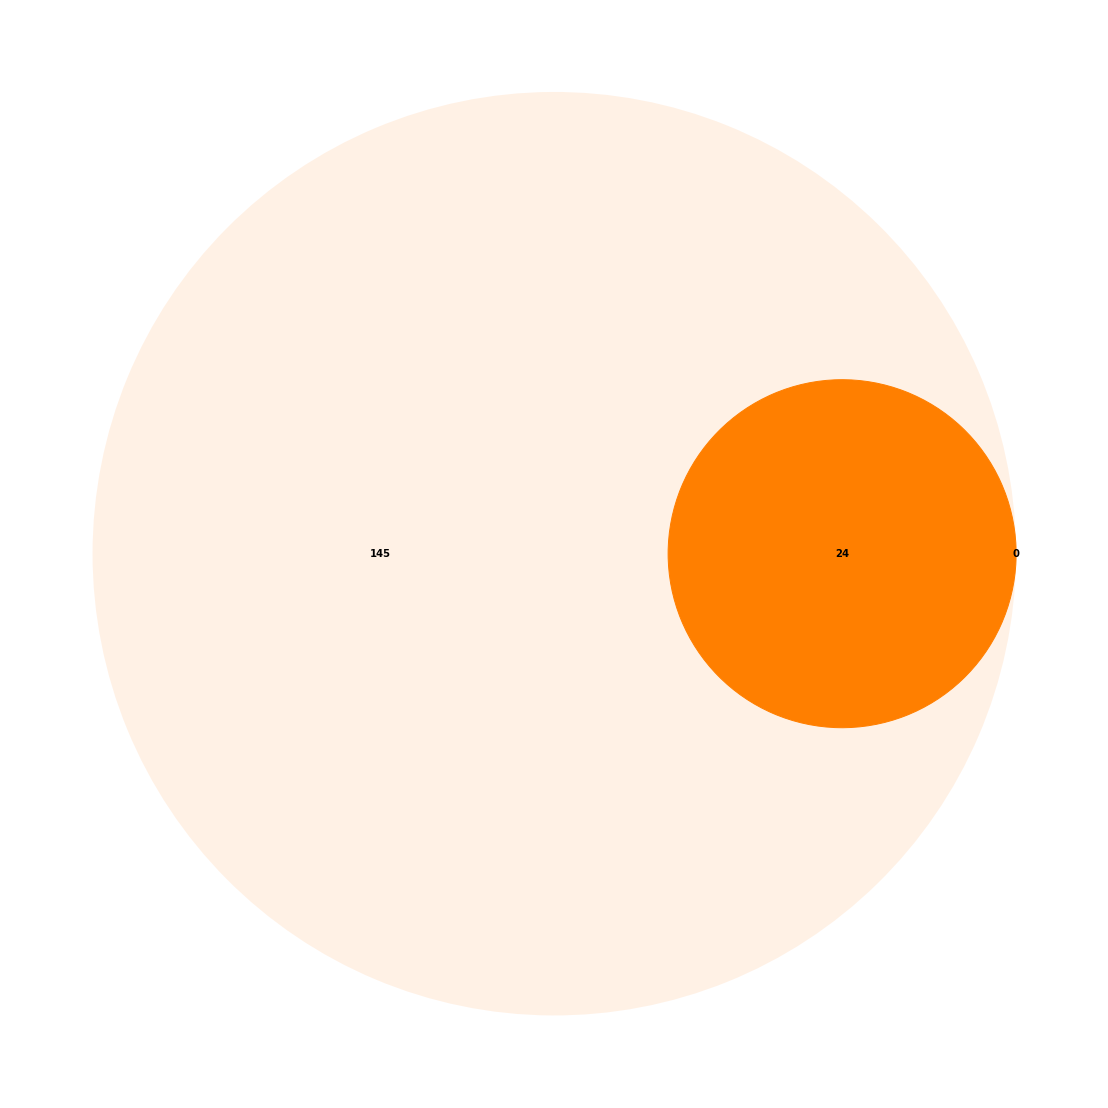

In [280]:
#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WEpB_Lgr6_un), set(genes_WEpB_Lgr6_un_sel)], ax = ax, set_colors=('#ff7f00','#ff7f00'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#ff7f00')

/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


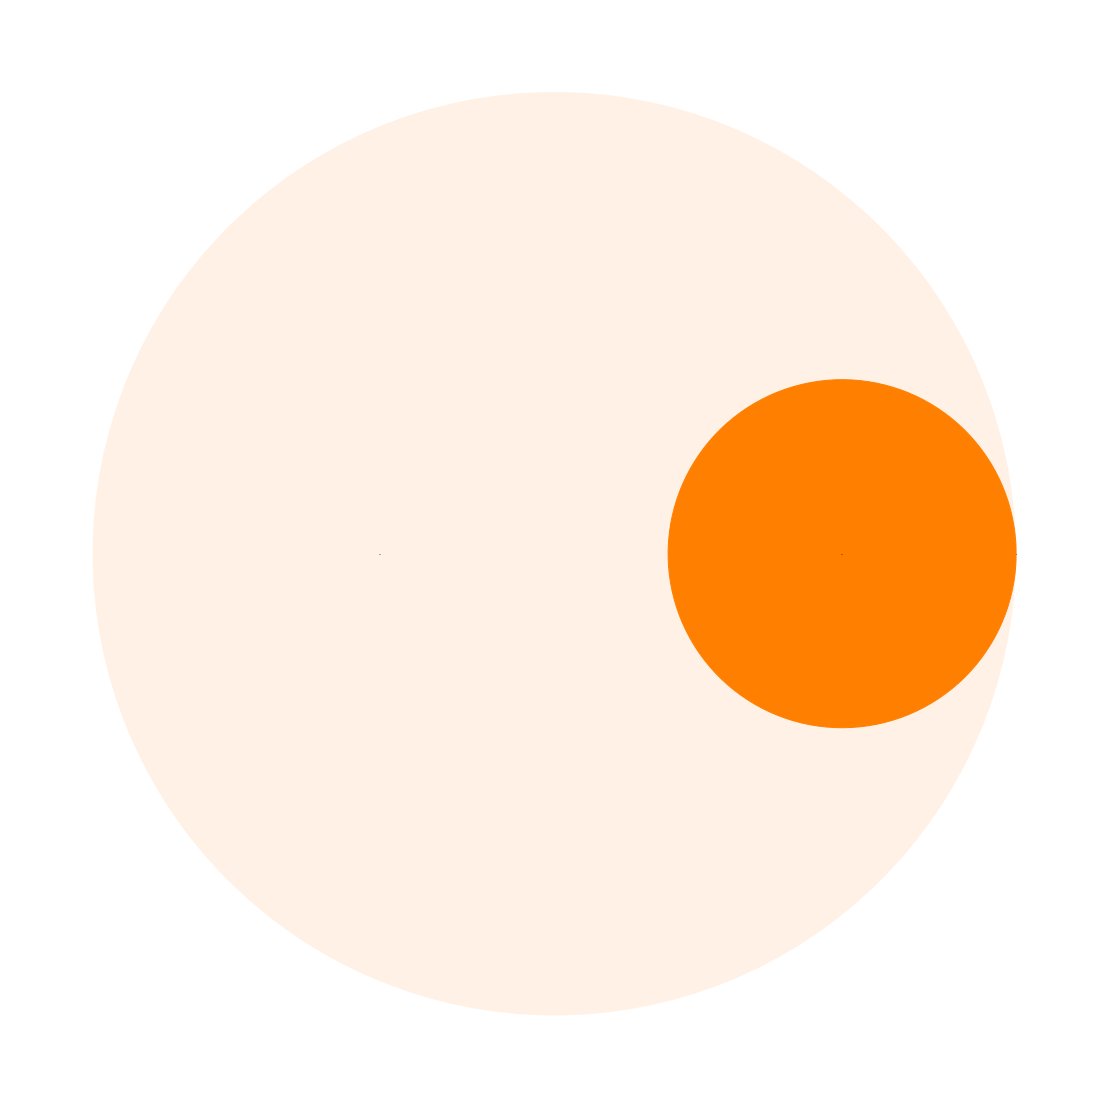

In [279]:


#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize subplot

ax = plt.subplot(111)

v = venn2(subsets = [set(genes_WEpB_Lgr6_un), set(genes_WEpB_Lgr6_un_sel)], ax = ax, set_colors=('#ff7f00','#ff7f00'), alpha = 0.1, set_labels = ('','',''))

for ix in ['01','10','11']:
    v.get_label_by_id(ix).set_family('Liberation Sans')
    v.get_label_by_id(ix).set_fontsize(0)
    v.get_label_by_id(ix).set_fontweight('bold')

a = 0.25    

v.get_patch_by_id('01').set_alpha(a)
v.get_patch_by_id('11').set_alpha(1.0)
v.get_patch_by_id('11').set_color('#ff7f00')

figname = 'v2.6_4_WEpB_venn2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

### Violin plots

In [208]:
NBR_WEpB_Lgr5_pval_0d_bin = neg_binom_get_binarized(NBR_WEpB_Lgr5_pval_0d, 0.001)
NBR_WEpB_Lgr6_pval_0d_bin = neg_binom_get_binarized(NBR_WEpB_Lgr6_pval_0d, 0.001)
NBR_WEpB_Lgr5_pval_Lgr6_bin = neg_binom_get_binarized(NBR_WEpB_Lgr5_pval_Lgr6, 0.001)
NBR_WEpB_Lgr6_pval_Lgr5_bin = neg_binom_get_binarized(NBR_WEpB_Lgr6_pval_Lgr5, 0.001)

In [210]:
NBR_WEpB_Lgr5_pval_0d_fc = neg_binom_get_fold_change(NBR_WEpB_max_summary, NBR_WEpB_Lgr5_pval_0d_bin, 'Lgr5 - ctrl')
NBR_WEpB_Lgr6_pval_0d_fc = neg_binom_get_fold_change(NBR_WEpB_max_summary, NBR_WEpB_Lgr6_pval_0d_bin, 'Lgr6 - ctrl')
NBR_WEpB_Lgr5_pval_Lgr6_fc = neg_binom_get_fold_change(NBR_WEpB_max_summary, NBR_WEpB_Lgr5_pval_Lgr6_bin, 'Lgr6 - WEpB')
NBR_WEpB_Lgr6_pval_Lgr5_fc = neg_binom_get_fold_change(NBR_WEpB_max_summary, NBR_WEpB_Lgr6_pval_Lgr5_bin, 'Lgr5 - WEpB')

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/Users/simjoo/anaco

In [211]:
NBR_WEpB_shared_fc = pd.concat([NBR_WEpB_Lgr5_pval_0d_fc['median']['Lgr5 - WEpB'],NBR_WEpB_Lgr6_pval_0d_fc['median']['Lgr6 - WEpB']],axis=1)

In [219]:
genes_sel = ['Rpl4','Eef1b2','Hmgb1','Tubb5','Ppia','Gnb2l1','Eif3i','Uqcrq','Nme2','Atp5e']

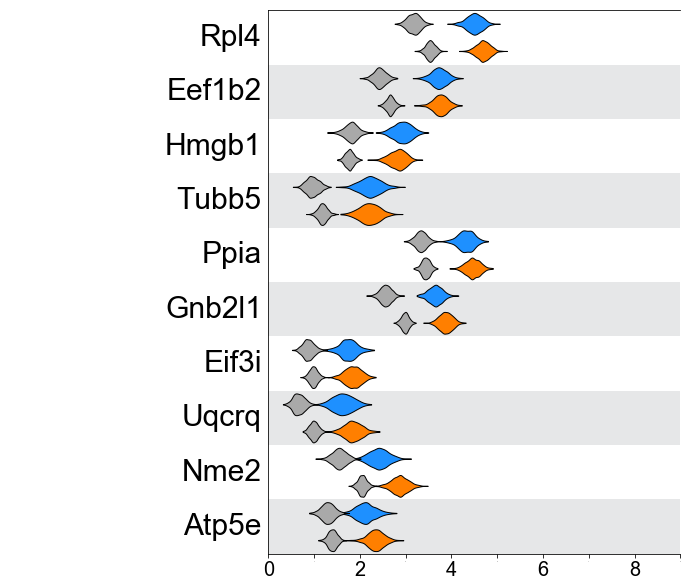

In [220]:
#define input variables

genes = genes_sel
L = len(genes)
traces = NBR_WEpB_max_traces
groups = [('Lgr5 - ctrl','Lgr5 - WEpB'),
          ('Lgr6 - ctrl','Lgr6 - WEpB')]
cmap = {'Lgr5 - ctrl':'darkgrey',
        'Lgr6 - ctrl':'darkgrey',
        'Lgr5 - WEpB':'dodgerblue',
        'Lgr6 - WEpB':'#ff7f00'}
subpos = {0:-0.25,1:0.25}

#initialize figure

height = 1.0 * len(genes)
width = 12
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#create gene name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)
  
#create violin plot axis
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('left')
ax1.yaxis.set_ticks([])

#iterate over genes
    
for ix, g in enumerate(genes):
    
    #print gene name
    
    if g in TF_mm9: ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center', fontstyle = 'italic')
    else: ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center')
        
    #print background
        
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#FFFFFF', zorder = 0)        
    elif ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#E6E7E8', zorder = 0)
  
    #iterate over groups
    
    for pos, gr in enumerate(groups):
        
        #print group traces
        
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[1])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                        widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[1])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[0])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                       widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[0])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
ax1.set_xlim(left = 0)
ax1.set_xlim(right = 9)
           
for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
    if ix % 2 == 0:
        t.set_family('Arial')
        t.set_fontsize(20)
    else:
        t.set_fontsize(0)

#ax1.set_xticks([])
        
figname = 'v2.6_4_WEpB_genes_shared.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [221]:
NBR_WEpB_Lgr5_fc = pd.concat([NBR_WEpB_Lgr5_pval_Lgr6_fc['median']['Lgr5 - WEpB'],NBR_WEpB_Lgr6_pval_0d_fc['median']['Lgr6 - WEpB']],axis=1)

In [248]:
genes_sel = ['Slc38a4','Abi3bp','Slc7a2','Hmgcs2','Krt17','Fstl1','Emb','Rasgef1b','Fbln1','Zbtb16']

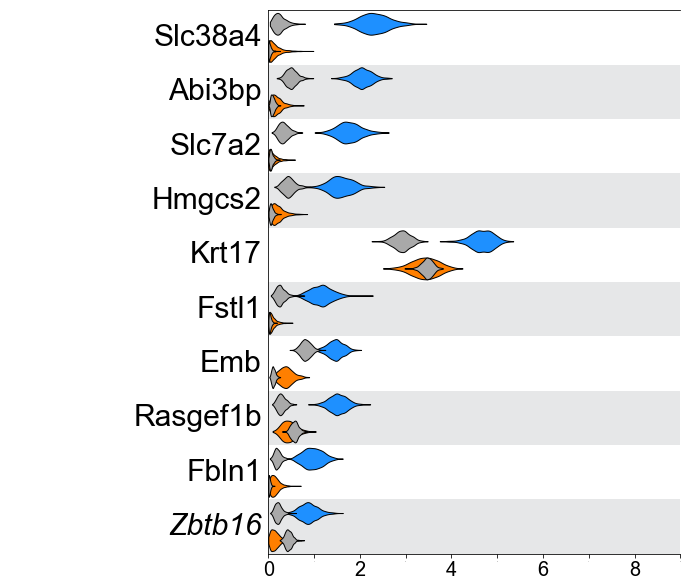

In [249]:
#define input variables

genes = genes_sel
L = len(genes)
traces = NBR_WEpB_max_traces
groups = [('Lgr5 - ctrl','Lgr5 - WEpB'),('Lgr6 - ctrl','Lgr6 - WEpB')]
cmap = {'Lgr5 - ctrl':'darkgrey',
        'Lgr6 - ctrl':'darkgrey',
        'Lgr5 - WEpB':'dodgerblue',
        'Lgr6 - WEpB':'#ff7f00'}
subpos = {0:-0.25,1:0.25}

#initialize figure

height = 1.0 * len(genes)
width = 12
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#create gene name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)
  
#create violin plot axis
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('left')
ax1.yaxis.set_ticks([])

#iterate over genes
    
for ix, g in enumerate(genes):
    
    #print gene name
    
    if g in TF_mm9: ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center', fontstyle = 'italic')
    else: ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center')
        
    #print background
        
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#FFFFFF', zorder = 0)        
    elif ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#E6E7E8', zorder = 0)
  
    #iterate over groups
    
    for pos, gr in enumerate(groups):
        
        #print group traces
        
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[1])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                        widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[1])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[0])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                       widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[0])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
ax1.set_xlim(left = 0)
ax1.set_xlim(right = 9)
           
for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
    if ix % 2 == 0:
        t.set_family('Arial')
        t.set_fontsize(20)
    else:
        t.set_fontsize(0)

#ax1.set_xticks([])
        
figname = 'v2.6_4_WEpB_genes_Lgr5.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [250]:
NBR_WEpB_Lgr6_fc = pd.concat([NBR_WEpB_Lgr6_pval_Lgr5_fc['median']['Lgr6 - WEpB'],NBR_WEpB_Lgr5_pval_0d_fc['median']['Lgr5 - WEpB']],axis=1)

In [251]:
NBR_WEpB_Lgr6_fc.ix[genes_WEpB_Lgr6_un_sel]['Lgr6 - WEpB'].sort_values()

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Calm2            0.758754
Mpp1             0.768795
Ifi27            0.775306
Tpt1             0.800899
Tagln2           0.805532
Anxa8            0.841275
Oat              0.917851
Rab3d            0.981268
Mrps28           0.987744
Mif              0.988137
Gapdh            1.095296
Fth1             1.141119
Aldoa            1.148811
1810037I17Rik    1.251526
Higd1a           1.281739
Lgals7           1.366023
S100a10          1.438070
S100a11          1.468045
Ccl27a_loc2      1.531252
Ifitm3           1.644989
Anxa2            1.689590
H3f3b            1.712360
Avpi1            1.952609
B2m              2.447500
Name: Lgr6 - WEpB, dtype: float64

In [266]:
genes_sel = ['B2m','H3f3b','Ccl27a_loc2','S100a11','S100a10','Lgals7','Aldoa','Mif','Mrps28','Anxa8']

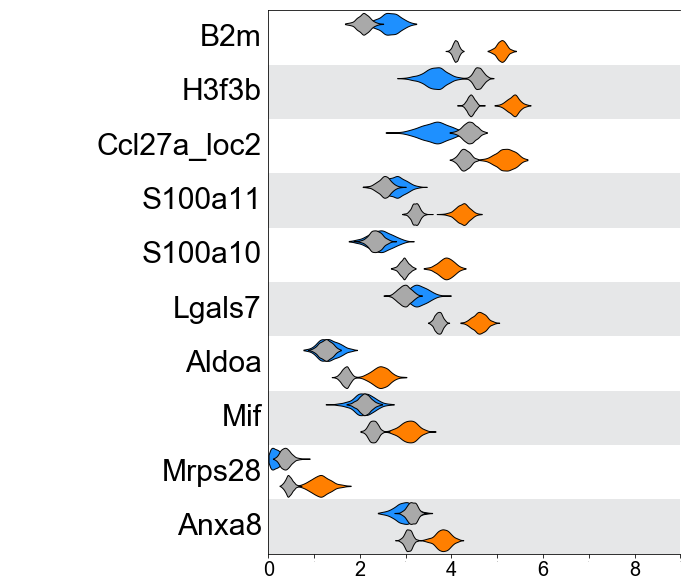

In [267]:
#define input variables

genes = genes_sel
L = len(genes)
traces = NBR_WEpB_max_traces
groups = [('Lgr5 - ctrl','Lgr5 - WEpB'),
          ('Lgr6 - ctrl','Lgr6 - WEpB')]
cmap = {'Lgr5 - ctrl':'darkgrey',
        'Lgr6 - ctrl':'darkgrey',
        'Lgr5 - WEpB':'dodgerblue',
        'Lgr6 - WEpB':'#ff7f00'}
subpos = {0:-0.25,1:0.25}

#initialize figure

height = 1.0 * len(genes)
width = 12
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(1, 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

#create gene name axis 
    
ax0 = plt.subplot(gs[0,0])
ax0.set_ylim(L - 0.5, -0.5)
clean_axis(ax0)
  
#create violin plot axis
    
ax1 = plt.subplot(gs[0,1])
ax1.spines['right'].set_color('none')
ax1.set_ylim(L - 0.5, -0.5)
ax1.yaxis.set_ticks_position('left')
ax1.yaxis.set_ticks([])

#iterate over genes
    
for ix, g in enumerate(genes):
    
    #print gene name
    
    ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center')
        
    #print background
        
    if ix % 2 == 0:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#FFFFFF', zorder = 0)        
    elif ix % 2 == 1:
        ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#E6E7E8', zorder = 0)
  
    #iterate over groups
    
    for pos, gr in enumerate(groups):
        
        #print group traces
        
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[1])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                        widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[1])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
        violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr[0])]],
                       positions = [ix + subpos[pos]],
                       vert=False,
                       showextrema=False, 
                       widths=0.4)
        
        for v in violin['bodies']:
            v.set_edgecolor('black')
            v.set_facecolor(cmap[str(gr[0])])
            v.set_linewidth(1.0)
            v.set_alpha(1.0)
            
ax1.set_xlim(left = 0)
ax1.set_xlim(right = 9)
           
for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
    if ix % 2 == 0:
        t.set_family('Arial')
        t.set_fontsize(20)
    else:
        t.set_fontsize(0)

#ax1.set_xticks([])
        
figname = 'v2.6_4_WEpB_genes_Lgr6.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)